<a href="https://colab.research.google.com/github/marcelounb/Deep_Learning_with_python_JasonBrownlee/blob/master/08_3_Kfold_on_Pima_Indians_Onset_of_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8.3 - Kfold on Pima Indians Onset of Diabetes Dataset
 patient medical record data for Pima Indians and whether they had an onset of diabetes within ﬁve years. It is a binary classiﬁcation problem (onset of diabetes as 1 or not as 0). The input variables that describe each patient are numerical and have varying scales. Below lists the eight attributes for the dataset:
1. Number of times pregnant.
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
3. Diastolic blood pressure (mm Hg).
4. Triceps skin fold thickness (mm).
5. 2-Hour serum insulin (mu U/ml).
6. Body mass index.
7. Diabetes pedigree function.
8. Age (years).
9. Class, onset of diabetes within ﬁve years.

Given that all attributes are numerical makes it easy to use directly with neural networks that expect numerical inputs and output values, and ideal for our ﬁrst neural network in Keras. This dataset will also be used for a number of additional lessons coming up in this book, so keep it handy. below is a sample of the dataset showing the ﬁrst 5 rows of the 768 instances:

6,148,72,35,0,33.6,0.627,50,1 

1,85,66,29,0,26.6,0.351,31,0 

8,183,64,0,0,23.3,0.672,32,1 

1,89,66,23,94,28.1,0.167,21,0 

0,137,40,35,168,43.1,2.288,33,1


# Loading Data

In [1]:
from keras.models import Sequential 
from keras.layers import Dense 
import numpy as np
# fix random seed for reproducibility 
seed = 7 
np.random.seed(seed)

Using TensorFlow backend.


In [0]:
# load pima indians dataset 
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",") 
# split into input (X) and output (Y) variables 
X = dataset[:,0:8] 
Y = dataset[:,8]

In [3]:
X.shape

(768, 8)

In [4]:
Y.shape

(768,)

In [0]:
from sklearn.model_selection import StratifiedKFold
# define 10-fold cross validation test harness 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed) 
cvscores = [] 
epochs_hist = []
for train, test in kfold.split(X, Y):
  # create model 
  model = Sequential() 
  model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' )) 
  model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' )) 
  model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))

  # Compile model 
  model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  #Model fit
  epochs_hist.append(model.fit(X[train], Y[train], epochs=100, batch_size=10, verbose=0))

  # Evaluate the model 
  scores = model.evaluate(X[test], Y[test], verbose=0)  
  model.metrics_names[1], scores[1]*100
  cvscores.append(scores[1] * 100)

In [30]:
print(np.mean(cvscores), np.std(cvscores))

74.35748398303986 4.686872887120245


In [32]:
cvscores

[71.42857313156128,
 79.22077775001526,
 72.72727489471436,
 75.32467246055603,
 70.1298713684082,
 64.9350643157959,
 79.22077775001526,
 75.32467246055603,
 73.68420958518982,
 81.57894611358643]

#Plotting it all

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
epochs_hist[0].history.keys()

dict_keys(['loss', 'accuracy'])

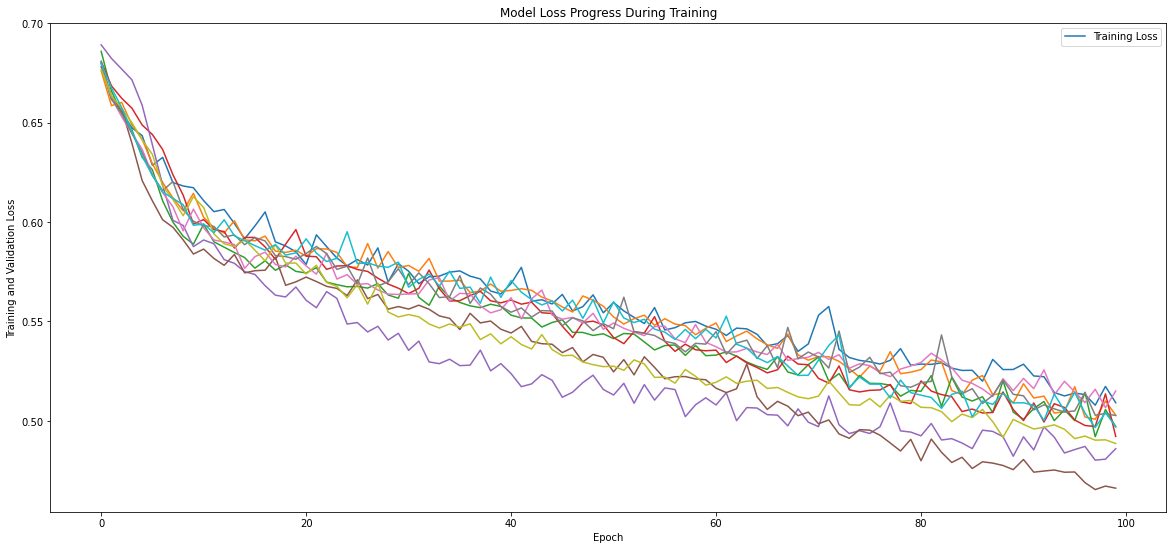

In [26]:
plt.figure(figsize=(20,9))
for i in epochs_hist:
  plt.plot(i.history['loss'])
  plt.title('Model Loss Progress During Training')
  plt.xlabel('Epoch')
  plt.ylabel('Training and Validation Loss')
  plt.legend(['Training Loss']);